# 05_load_raster

Following  https://leafmap.org/notebooks/05_load_raster/

Uses the ipyleaflet plotting backend. The folium plotting backend does not support the `add_raster` function.


```
conda create -n leafmap -c conda-forge leafmap xarray_leaflet localtileserver netcdf4
conda activate leafmap
```

In [1]:
import os
import leafmap.leafmap as leafmap

## load tif files from the example

Download sample raster datasets

More datasets can be downloaded from https://viewer.nationalmap.gov/basic/

In [2]:
landsat = "landsat.tif"
dem = "dem.tif"

In [3]:
url1 = "https://open.gishub.org/data/raster/landsat7.tif"
url2 = "https://open.gishub.org/data/raster/srtm90.tif"
satellite = leafmap.download_file(url1, landsat)
dem = leafmap.download_file(url2, dem)

landsat.tif already exists. Skip downloading. Set overwrite=True to overwrite.
dem.tif already exists. Skip downloading. Set overwrite=True to overwrite.


In [4]:
! gdalinfo landsat.tif

Driver: GTiff/GeoTIFF
Files: landsat.tif
Size is 2181, 1917
Coordinate System is:
PROJCRS["WGS 84 / Pseudo-Mercator",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            MEMBER["World Geodetic System 1984 (G2296)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Popular Visualisation Pseudo-Mercator",
        METHOD["Popular Visualisation Pse

In [5]:
m = leafmap.Map()
m.add_raster(dem, colormap="terrain", layer_name="DEM")
m.add_raster(landsat, bands=[1, 2, 3], layer_name="Landsat") 
# m.add_raster(landsat, layer_name="Landsat")
m

Map(center=[37.7736215, -122.34097449999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…

## load a netcdf file 
To be reviewed..

In [8]:
! ncdump -h ../qva/qva_det_Ruapehu_202501081200.nc


netcdf qva_det_Ruapehu_202501081200 {
dimensions:
	time = UNLIMITED ; // (24 currently)
	latitude = 361 ;
	longitude = 441 ;
	levels = 12 ;
variables:
	float latitude(latitude) ;
		latitude:_FillValue = NaNf ;
		latitude:long_name = "latitude degrees north from the equator" ;
		latitude:units = "degrees_north" ;
		latitude:point_spacing = "even" ;
	float longitude(longitude) ;
		longitude:_FillValue = NaNf ;
		longitude:long_name = "longitude degrees east from the greenwich meridian" ;
		longitude:units = "degrees_east" ;
		longitude:point_spacing = "even" ;
	double levels(levels) ;
		levels:_FillValue = NaN ;
		levels:long_name = "Top of flight level layer" ;
		levels:units = "feet" ;
		levels:axis = "Z" ;
		levels:positive = "up" ;
	int64 time(time) ;
		time:axis = "T" ;
		time:long_name = "time" ;
		time:units = "hours since 2025-01-08T13:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	float concentration(time, levels, latitude, longitude) ;
		concentration:_FillValue = NaNf ;
	

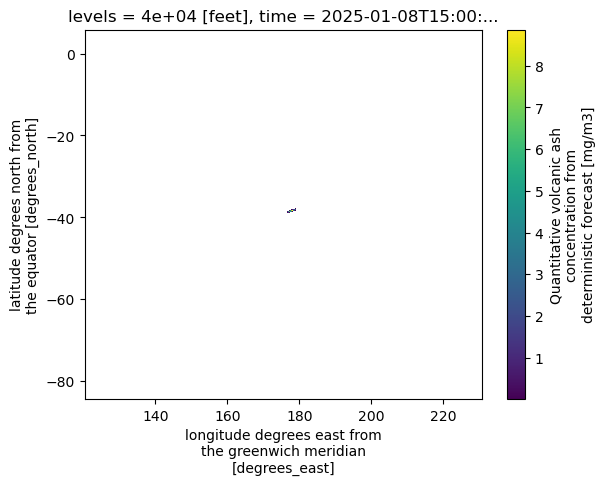

In [36]:
ds = leafmap.read_netcdf('../qva/qva_det_Ruapehu_202501081200.nc')
ds.rio.write_crs("EPSG:4326", inplace=True)

da = ds['concentration'].isel(time=2, levels=7)
da = da.where(da > 1e-6)

da.plot()




In [37]:
m = leafmap.Map()
m.add_raster(da, layer_name="QVA")
m

Map(center=[-39.279999000000004, 175.570007], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…